# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sahrul Saefuloh
- **Email:** m409d4ky3034@bangkit.academy
- **ID Dicoding:** sahrulsf

## Menentukan Pertanyaan Bisnis

- Question 1 : What season has the highest bike rent.
- Question 2 : Displays the highest number of rentals every month.

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [10]:
print("Jumlah Duplikasi : ",hour_df.duplicated().sum())

Jumlah Duplikasi :  0


## Cleaning Data

#### Membersihkan Tabel Day

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Memperbaiki "TypeData" pada kolom "dteday" dari "object" menjadi "datetime"

In [12]:
dateday_column = ["dteday"]

for column in dateday_column :
    day_df[column] = pd.to_datetime(day_df[column])

Membersihkan tabel hour

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Memperbaiki "TypeData" pada kolom "dteday" dari "object" menjadi "datetime"

In [14]:
dateday_column = ["dteday"]

for column in dateday_column :
    hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Mengganti nama kolom yang membingungkan, yang disesuaikan dengan "readme.txt"

- 1. dteday = date
- 2. yr     = year
- 3. mnth   = month
- 4. hr     = hour
- 5. weathersit = weather
- 6. temp = temperature
- 7. hum    = humidity
- 8. cnt    = count


In [16]:
day_df = day_df.rename(columns={
    "weathersit":"weather",
    "dteday":"date",
    "yr":"year",
    "mnth":"month",
    "temp": "temperature",
    "hum":"humidity",
    "cnt":"count"
})

In [17]:
hour_df= hour_df.rename(columns={
    "weathersit":"weather",
    "dteday":"date",
    "yr":"year",
    "mnth":"month",
    "temp": "temperature",
    "hum":"humidity",
    "cnt":"count"
})

Memeriksa apakah data sudah berubah atau belum

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weather      731 non-null    int64         
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: datet

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   month        17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weather      17379 non-null  int64         
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

## Explarory Data Analysis (EDA)

Explore tabel day

In [20]:
day_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
286,287,2011-10-14,4,0,10,0,5,1,2,0.550833,0.529675,0.716250,0.223883,529,3115,3644
70,71,2011-03-12,1,0,3,0,6,0,1,0.329167,0.325750,0.594583,0.220775,724,1408,2132
112,113,2011-04-23,2,0,4,0,6,0,2,0.460000,0.450121,0.887917,0.230725,1462,2574,4036
528,529,2012-06-12,2,1,6,0,2,1,2,0.653333,0.597875,0.833333,0.214546,477,4495,4972
720,721,2012-12-21,1,1,12,0,5,1,2,0.326667,0.301767,0.556667,0.374383,221,3402,3623


In [21]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [22]:
day_df.instant.is_unique

True

#### Pertanyaan 1 : Berapakah jumlah pendaftar baru (registered) pada rental sepeda pada setiap bulan

In [23]:
resgistered_count_df = day_df.groupby(["year", "month"])["registered"].sum()
print(resgistered_count_df)


year  month
0     1         35116
      2         41973
      3         51219
      4         72524
      5        104771
      6        112900
      7        104889
      8        107849
      9        100873
      10        98289
      11        86573
      12        78875
1     1         87775
      2         94416
      3        133257
      4        135768
      5        151630
      6        159536
      7        161902
      8        171306
      9        174795
      10       164303
      11       131655
      12       110468
Name: registered, dtype: int64


Explore hour table

### Pertanyaan 2 : Menampilkan jumlah rental setiap bulan

In [24]:
rent_df = day_df.groupby(["year", "month"])["count"].sum()
print(rent_df)

year  month
0     1         38189
      2         48215
      3         64045
      4         94870
      5        135821
      6        143512
      7        141341
      8        136691
      9        127418
      10       123511
      11       102167
      12        87323
1     1         96744
      2        103137
      3        164875
      4        174224
      5        195865
      6        202830
      7        203607
      8        214503
      9        218573
      10       198841
      11       152664
      12       123713
Name: count, dtype: int64


## Visualization & Explanatory Analysis



In [25]:
day_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
497,498,2012-05-12,2,1,5,0,6,0,1,0.564167,0.544817,0.480417,0.123133,2622,4807,7429
710,711,2012-12-11,4,1,12,0,2,1,2,0.353333,0.338363,0.596667,0.296037,282,5219,5501
356,357,2011-12-23,1,0,12,0,5,1,1,0.373333,0.377513,0.686250,0.274246,163,2046,2209
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
236,237,2011-08-25,3,0,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833,435,3107,3542


In [26]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



### Question 1 : What season has the highest bike rent

In [42]:
seasonly_users_df = day_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

seasonly_users_df.head()

,casual,registered,count
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


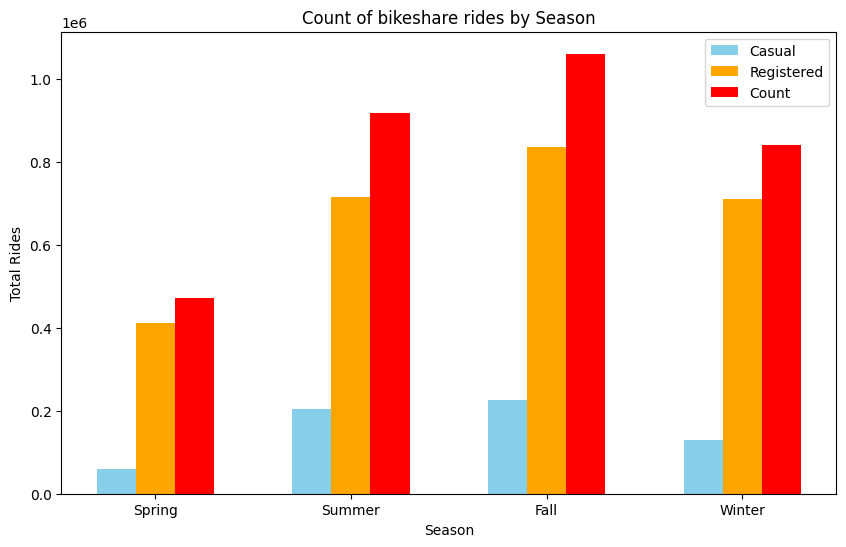

In [45]:
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = seasonly_users_df.index
casual_bars = plt.bar(index - bar_width, seasonly_users_df["casual"], bar_width, color='skyblue', label='Casual')
registered_bars = plt.bar(index, seasonly_users_df["registered"], bar_width, color='orange', label='Registered')
count_bars = plt.bar(index + bar_width, seasonly_users_df["count"], bar_width, color='red', label='Count')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")
plt.xticks(index, ['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend()

plt.show()

### Conclusion from Question 1 

From the above data visualization, most rental bike in fall season.

### Question 2 : Displays the highest number of rentals every month

In [33]:
rent_df = day_df.resample(rule="M", on='date').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"  
})

rent_df.index = rent_df.index.strftime('%B')
rental_df = rent_df.reset_index()
rental_df.rename(columns={
    "count": "rent_count" 
}, inplace=True)
rent_df.head()

,casual,registered,count
date,,,
January,3073,35116,38189
February,6242,41973,48215
March,12826,51219,64045
April,22346,72524,94870
May,31050,104771,135821


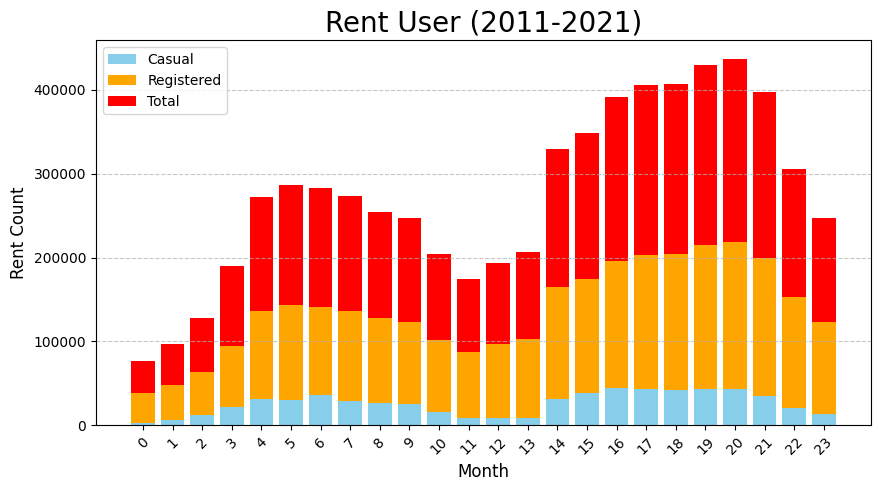

In [40]:
plt.figure(figsize=(10, 5))
plt.bar(
    rental_df.index,
    rental_df["casual"],
    color='skyblue',
    label='Casual'
)
plt.bar(
    rental_df.index,
    rental_df["registered"],
    color='orange',
    label='Registered',
    bottom=rental_df["casual"]
)
plt.bar(
    rental_df.index,
    rental_df["rent_count"],
    color='red',
    label='Total',
    bottom=rental_df["casual"] + rental_df["registered"]
)

plt.title("Rent User (2011-2021)", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Rent Count", fontsize=12)
plt.xticks(ticks=range(len(rental_df.index)), labels=rental_df.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

In [35]:
most_reg_df = day_df.resample(rule="M", on='date').agg({
    "count": "sum"
})

most_reg_df.index = most_reg_df.index.strftime('%B')

most_reg_df = most_reg_df.reset_index()

most_reg_month = most_reg_df.loc[most_reg_df['count'].idxmax()]
most_reg_count = most_reg_month.pop('count')  
most_reg_month_name = most_reg_month['date']  

print("Most rent are in the month of:", most_reg_month, "with registered count:", most_reg_count)

Most rent are in the month of: date    September
Name: 20, dtype: object with registered count: 218573


In [36]:
most_reg_df = day_df.resample(rule="M", on='date').agg({
    "count": "sum"
})

most_reg_df.index = most_reg_df.index.strftime('%B')

most_reg_df = most_reg_df.reset_index()

most_reg_month = most_reg_df.loc[most_reg_df['count'].idxmin()]
most_reg_count = most_reg_month.pop('count')  
most_reg_month_name = most_reg_month['date']  

print("Most rent are in the month of:", most_reg_month, "with registered count:", most_reg_count)

Most rent are in the month of: date    January
Name: 0, dtype: object with registered count: 38189


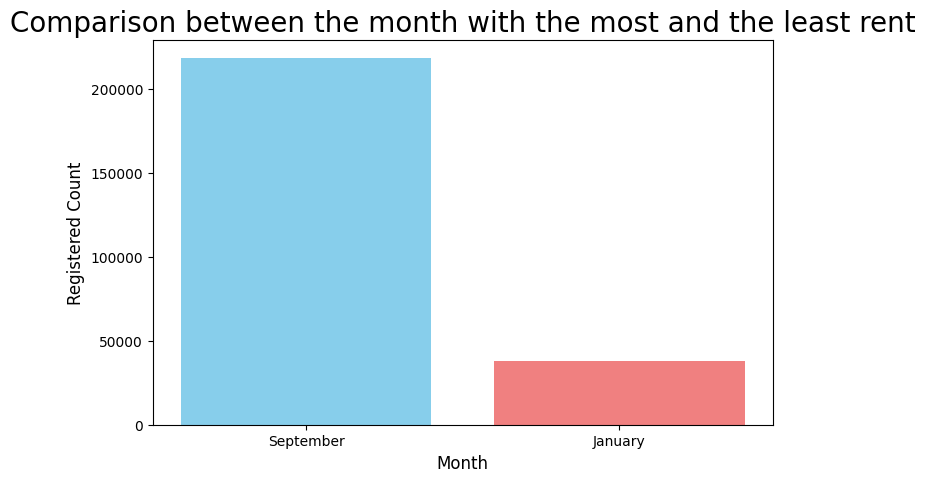

In [37]:
most_reg_df = day_df.resample(rule="M", on='date').agg({
    "count": "sum"
})

most_reg_df.index = most_reg_df.index.strftime('%B')
most_reg_df = most_reg_df.reset_index()
most_reg_max = most_reg_df.loc[most_reg_df['count'].idxmax()]
most_reg_min = most_reg_df.loc[most_reg_df['count'].idxmin()]

plt.figure(figsize=(8, 5))
plt.bar([most_reg_max['date'], most_reg_min['date']], [most_reg_max['count'], most_reg_min['count']], color=['skyblue', 'lightcoral'])
plt.title("Comparison between the month with the most and the least rent", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Registered Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Conclusion Question 2

From the visualization above, it states that in September 2012 bike rentals were the most and in January 2011 they were the least.

In [38]:
#day_df.to_csv("all_data_day.csv", index=False)

In [39]:
#hour_df.to_csv("all_data_hour.csv", index=False)